<a href="https://colab.research.google.com/github/JavatJones/My-Data-Science-projects/blob/main/Human_Resources_Department.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK #0: Target
Objective: To build a model that predicts whether an employee will leave the company or not.

# TASK #1: IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Debe incluir el enlace completo al archivo csv que contiene su conjunto de datos
employee_df = pd.read_csv('/content/sample_data/Human_Resources.csv')

In [3]:
#Configurations
pd.options.display.max_columns = None
plt.style.use('ggplot')

In [4]:
#Get sample of the dataframe
employee_df.sample(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1346,45,No,Travel_Rarely,556,Research & Development,25,2,Life Sciences,1,1888,2,Female,93,2,2,Manufacturing Director,4,Married,5906,23888,0,Y,No,13,3,4,80,2,10,2,2,9,8,3,8
957,40,No,Non-Travel,458,Research & Development,16,2,Life Sciences,1,1340,3,Male,74,3,1,Research Scientist,3,Divorced,3544,8532,9,Y,No,16,3,2,80,1,6,0,3,4,2,0,0
187,55,No,Travel_Rarely,692,Research & Development,14,4,Medical,1,254,3,Male,61,4,5,Research Director,2,Single,18722,13339,8,Y,No,11,3,4,80,0,36,3,3,24,15,2,15
146,30,No,Travel_Rarely,1427,Research & Development,2,1,Medical,1,198,2,Male,35,2,1,Laboratory Technician,4,Single,2720,11162,0,Y,No,13,3,4,80,0,6,3,3,5,3,1,2
577,37,No,Travel_Rarely,571,Research & Development,10,1,Life Sciences,1,802,4,Female,82,3,1,Research Scientist,1,Divorced,2782,19905,0,Y,Yes,13,3,2,80,2,6,3,2,5,3,4,3
582,40,No,Travel_Frequently,791,Research & Development,2,2,Medical,1,807,3,Female,38,4,2,Healthcare Representative,2,Married,4244,9931,1,Y,No,24,4,4,80,1,8,2,3,8,7,3,7
217,29,Yes,Travel_Rarely,992,Research & Development,1,3,Technical Degree,1,300,3,Male,85,3,1,Research Scientist,3,Single,2058,19757,0,Y,No,14,3,4,80,0,7,1,2,6,2,1,5
323,28,Yes,Travel_Rarely,1157,Research & Development,2,4,Medical,1,440,1,Male,84,1,1,Research Scientist,4,Married,3464,24737,5,Y,Yes,13,3,4,80,0,5,4,2,3,2,2,2
1456,35,No,Travel_Frequently,1199,Research & Development,18,4,Life Sciences,1,2049,3,Male,80,3,2,Healthcare Representative,3,Married,5689,24594,1,Y,Yes,14,3,4,80,2,10,2,4,10,2,0,2
1069,28,No,Travel_Rarely,1423,Research & Development,1,3,Life Sciences,1,1506,1,Male,72,2,1,Research Scientist,3,Divorced,1563,12530,1,Y,No,14,3,4,80,1,1,2,1,1,0,0,0


In [5]:
employee_df.info() #get info of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
# Watch the shape of the dataframe
employee_df.shape

(1470, 35)

In [7]:
employee_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# TASK #2: EDA DATASET VISUALIZATION

In [8]:
# We replace the columns 'Attritition' and 'overtime' with integers before we can perform any visualization.

employee_df['Attrition'] = employee_df['Attrition'].map({'No':0,'Yes':1})

employee_df['OverTime'] = employee_df['OverTime'].map({'No':0,'Yes':1})

employee_df['Over18'] = employee_df['Over18'].map({'N':0,'Y':1})

In [9]:
employee_df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2


In [10]:
# There isnt missing data
employee_df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [11]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

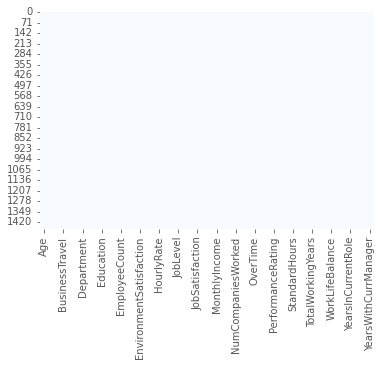

In [12]:
# Detecting missing values with a heat graph
sns.heatmap(employee_df.isnull(),cbar=False,cmap='Blues')

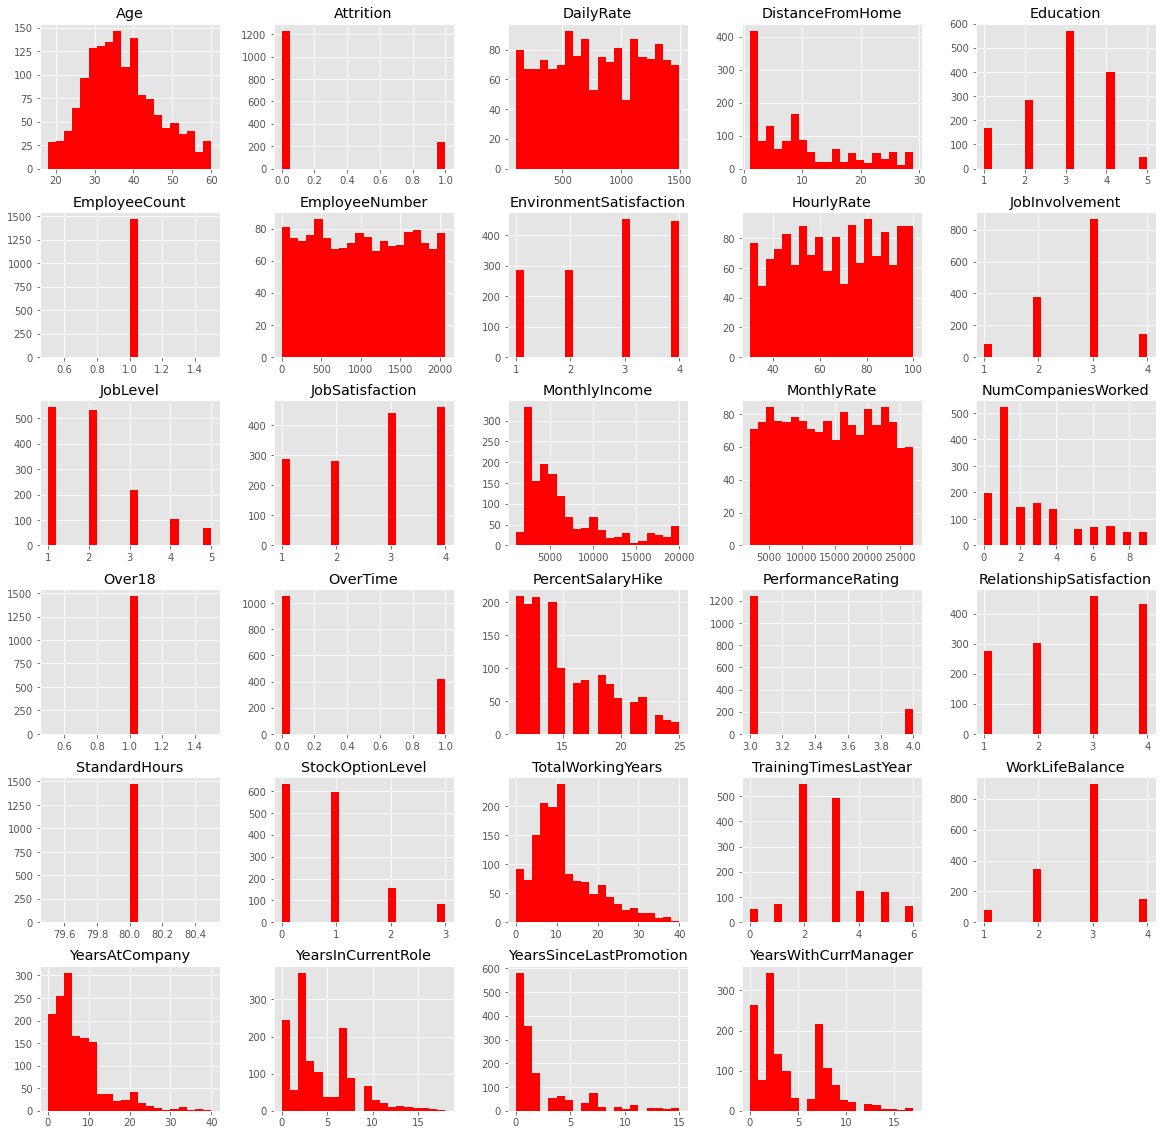

In [13]:
# Some characteristics such as 'MonthlyIncome' and 'TotalWorkingYears' have a very long tail distribution.
# It is necessary to remove 'EmployeeCount' and 'Standardhours' as these fields do not change from one employee to another.
employee_df.hist(bins=20,figsize=(20,20),color='r')
plt.show()

In [14]:
# It makes sense to get rid of 'EmployeeCount' , 'Standardhours' and 'Over18' as they are fields that do not change from one employee to another.
# Let's remove 'EmployeeNumber' as well because it is not a column that does not contribute anything.
employee_df.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber'],axis=1,inplace=True)

In [15]:
# Let's see how many employees leave the company!
left_df = employee_df[employee_df['Attrition'] == 1]
stayed_df = employee_df[employee_df['Attrition'] == 0]

### Print the count of people that stayed
print('Number of people who stayed: ',len(stayed_df))
### Print the count of people who left
print('Number of people who left: ',len(left_df))
### Print the percentage of people who left.
print('Percentage of people who left: ',round(len(left_df)/len(employee_df)*100,2),'%')
### Print the percentage of people who stayed
print('Percentage of people who stayed: ',round(len(stayed_df)/len(employee_df)*100,2),'%')

Number of people who stayed:  1233
Number of people who left:  237
Percentage of people who left:  16.12 %
Percentage of people who stayed:  83.88 %


In [16]:
left_df.describe()

# Let's compare the mean and standard error of the employees who stayed and left....
# 'age': Older people tend to stay with the company.
# 'DailyRate': the DailyRate is higher for people who do not leave the company.
# 'DistanceFromHome': Employees who live farther from work leave the job.
# 'EnvironmentSatisfaction' & 'JobSatisfaction': Employees who stay are more satisfied with the job.
# 'NumCompaniesWorked': Employees who leave have a higher number of companies they worked for on average.

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,0.535865,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,7208.153264,2.678519,0.499768,3.770294,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,14618.000000,1.000000,1.000000,14.000000,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,21081.000000,5.000000,1.000000,17.000000,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [17]:
stayed_df.describe()


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.64558,0.234388,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,7102.260749,2.46009,0.423787,3.639511,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.00000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,7973.000000,1.00000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,14120.000000,2.00000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8834.000000,20364.000000,4.00000,0.000000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26997.000000,9.00000,1.000000,25.000000,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


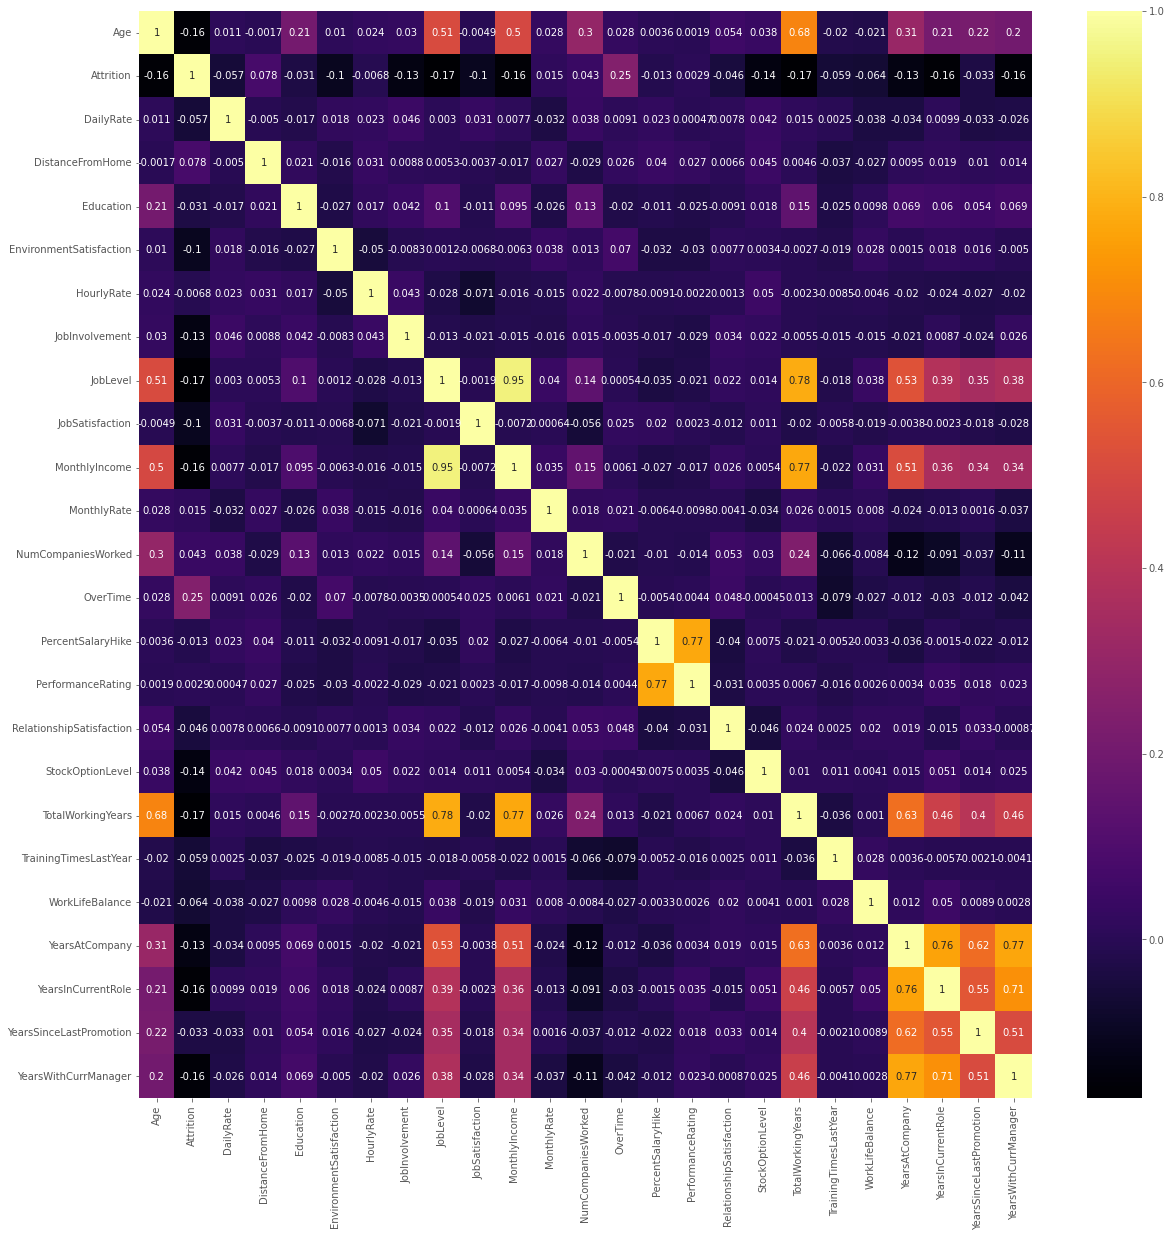

In [18]:
### Get the correlation analysis of the dataframe.
corr = employee_df.corr()

### Plot the correlation of the dataframe.
plt.figure(figsize=(20, 20))
sns.heatmap(corr,cmap='inferno',annot=True,)
plt.show()
### Results
# 'Age' = Age has a high correlation with {TotalWorkingYears} and moderate relationship with {"MonthlyIncome"} and {"JobLevel"}. 
# 'JobLevel' = Job level has a high correlation with the total years worked in the company.

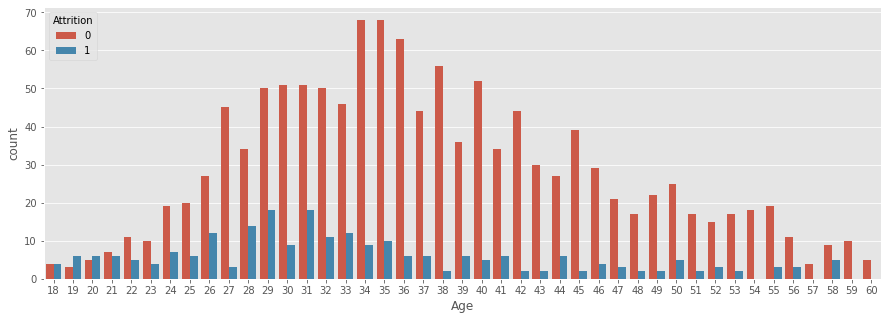

In [19]:
# Chart to monitor people leaving or staying in the company according to age
plt.figure(figsize=(15,5))
sns.countplot(x='Age',hue='Attrition',data=employee_df)
plt.show()

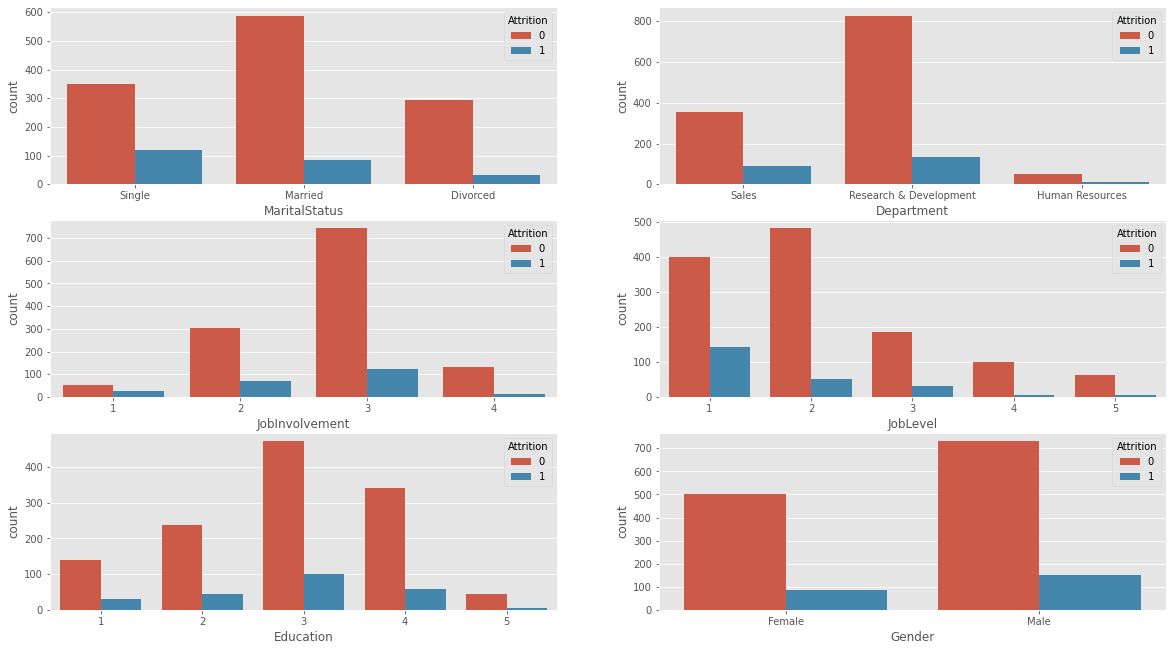

In [20]:
plt.figure(figsize=(20,15))
plt.subplot(421)
sns.countplot(x='MaritalStatus', hue='Attrition',data=employee_df) # Employees without a partner tend to leave compared to married and divorced. Divorced employees tend not to leave.
plt.subplot(422)
sns.countplot(x='Department', hue='Attrition',data=employee_df) # Sales reps tend to leave compared to any other job.
plt.subplot(423)
sns.countplot(x='JobInvolvement', hue='Attrition',data=employee_df) # Employees with medium involvement tend to leave.
plt.subplot(424)
sns.countplot(x='JobLevel', hue='Attrition',data=employee_df) # Entry level people tend to leave the company.
plt.subplot(425)
sns.countplot(x='Education', hue='Attrition',data=employee_df) # Third and fourth graders tend to leave the company.
plt.subplot(426)
sns.countplot(x='Gender', hue='Attrition',data=employee_df) # Men leave more than women.
plt.show()



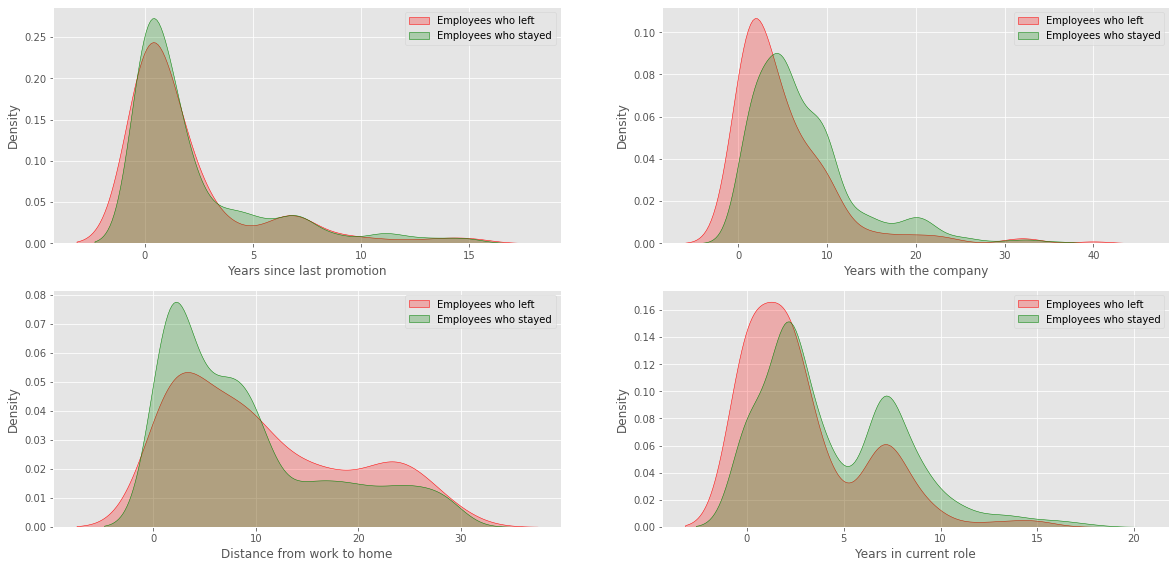

In [21]:
#YearsSinceLastPromotion
plt.figure(figsize=(20,20))
plt.subplot(421) # Result = Remaining employees have about 1 to 2 years since their last promotion.
sns.kdeplot(x=left_df['YearsSinceLastPromotion'],label = "Employees who left" ,shade=True,color='r')
sns.kdeplot(x=stayed_df['YearsSinceLastPromotion'], label = "Employees who stayed" ,shade=True,color='g')
plt.xlabel('Years since last promotion')
plt.legend()
plt.subplot(422) # Result = The employees who left the company had been with the company for 0 to 7 years.
sns.kdeplot(x=left_df['YearsAtCompany'], label = "Employees who left" ,shade=True,color='r')
sns.kdeplot(x=stayed_df['YearsAtCompany'], label = "Employees who stayed" ,shade=True,color='g')
plt.xlabel('Years with the company')
plt.legend()
plt.subplot(423) # Result = More employees have to travel a greater distance from home to work.
sns.kdeplot(x=left_df['DistanceFromHome'], label = "Employees who left" ,shade=True,color='r')
sns.kdeplot(x=stayed_df['DistanceFromHome'], label = "Employees who stayed" ,shade=True,color='g')
plt.xlabel('Distance from work to home')
plt.legend()
plt.subplot(424) # Result = The employees who left only spent about 0 to 4 years in their position.
sns.kdeplot(x=left_df['YearsInCurrentRole'], label = "Employees who left" ,shade=True,color='r')
sns.kdeplot(x=stayed_df['YearsInCurrentRole'], label = "Employees who stayed" ,shade=True,color='g')
plt.xlabel('Years in current role')
plt.legend()
plt.show()

# TASK #3: CREATE TRAINING AND TESTING DATA SETS AND PERFORM DATA CLEANSING

In [22]:
### Separate int columns from object columns
numerical_col   = employee_df.select_dtypes(include=['int64'])
categorical_col = employee_df.select_dtypes(exclude=['int64'])

In [23]:
# obtain the dummies of the categorical columns
categorical_col = pd.get_dummies(categorical_col)

In [24]:
categorical_col.head(5)

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


In [25]:
numerical_col.head(5)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [26]:
normalized =  numerical_col.join(categorical_col,how='right')

In [27]:
normalized

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1466,39,0,613,6,1,4,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0
1467,27,0,155,4,3,2,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
1468,49,0,1023,2,3,4,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [28]:
# Hemos elminado la columna target, 'Atrittion' para separarlos
x_ = normalized.drop('Attrition', axis=1)
y = normalized.Attrition

In [29]:
x_.head(5)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


In [30]:
y.head(5)

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [31]:
# Normalizar los datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_)


In [33]:
x_scaled

array([[ 0.4463504 ,  0.74252653, -1.01090934, ..., -0.53487311,
        -0.91892141,  1.45864991],
       [ 1.32236521, -1.2977746 , -0.14714972, ..., -0.53487311,
         1.08823234, -0.68556546],
       [ 0.008343  ,  1.41436324, -0.88751511, ..., -0.53487311,
        -0.91892141,  1.45864991],
       ...,
       [-1.08667552, -1.60518328, -0.64072665, ..., -0.53487311,
         1.08823234, -0.68556546],
       [ 1.32236521,  0.54667746, -0.88751511, ..., -0.53487311,
         1.08823234, -0.68556546],
       [-0.32016256, -0.43256792, -0.14714972, ..., -0.53487311,
         1.08823234, -0.68556546]])

In [34]:
#Split train y test variables
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=42)

In [35]:
X_train

array([[-0.86767181, -0.5218156 , -0.27054395, ..., -0.53487311,
        -0.91892141,  1.45864991],
       [-0.10115885,  0.20208225, -1.01090934, ..., -0.53487311,
        -0.91892141,  1.45864991],
       [-0.32016256,  1.29784543, -0.76412088, ..., -0.53487311,
        -0.91892141,  1.45864991],
       ...,
       [-1.63418477,  1.12430828, -0.76412088, ..., -0.53487311,
         1.08823234, -0.68556546],
       [-0.86767181,  1.42675875,  0.46982144, ..., -0.53487311,
         1.08823234, -0.68556546],
       [ 1.43186707, -1.33496114, -0.02375549, ..., -0.53487311,
         1.08823234, -0.68556546]])

In [36]:
X_test

array([[-0.97717366,  0.15745841, -0.51733242, ..., -0.53487311,
        -0.91892141,  1.45864991],
       [ 1.76037262,  0.69790269,  0.46982144, ...,  1.86960232,
        -0.91892141, -0.68556546],
       [-1.41518107, -1.39445959,  1.58036953, ..., -0.53487311,
         1.08823234, -0.68556546],
       ...,
       [ 0.33684855,  1.23338878,  1.82715799, ...,  1.86960232,
        -0.91892141, -0.68556546],
       [-1.30567922, -1.22340153, -0.88751511, ..., -0.53487311,
         1.08823234, -0.68556546],
       [ 1.10336151,  0.90862638,  0.59321567, ..., -0.53487311,
         1.08823234, -0.68556546]])

#TASK 4: TRAIN AND EVALUATE A CLASSIFIER USING LOGISTIC REGRESSION

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
lr = LogisticRegression(random_state=0).fit(X_train,y_train)

In [39]:
y_pred=lr.predict(X_test)

In [40]:
score = lr.score(X_train,y_train)
print('El score del modelo es: ',round(score,4)*100,"%")

El score del modelo es:  88.48 %


In [41]:
score = lr.score(X_test,y_test)
print('El score del modelo de prueba es: ',round(score,4)*100,"%")

El score del modelo de prueba es:  89.4 %


Tabla de confusión: 
[[308  12]
 [ 27  21]]


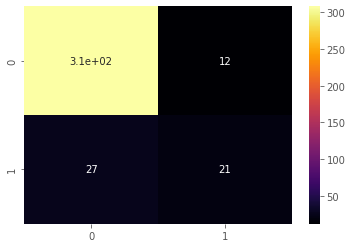

In [42]:
#Table of the classification report for predictions
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test,y_pred)
print('Tabla de confusión: ')
print(conf)
sns.heatmap(conf,cmap='inferno',annot=True)
plt.show()

In [43]:
# Testing Set Results
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       320
           1       0.64      0.44      0.52        48

    accuracy                           0.89       368
   macro avg       0.78      0.70      0.73       368
weighted avg       0.88      0.89      0.89       368



In [44]:
# Results of the classification by logistic regression...

# It was obtained that the model is able to predict who is going to stay with a high rate of success,
# but this model is mediocre with respect to predicting who will leave the company, this is due to the fact that 
# the dataset is unbalanced because there is very little data regarding the people who are leaving 
# from the company, so one plan of action is to try to address this is to select a smaller sample of data
# with respect to employees who stay


# TAREA #5: ENTRENAR Y EVALUR UN CLASIFICADOR UTILIZANDO BOSQUES ALEATORIOS

In [45]:
#the random forest model is imported and the training is performed
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [46]:
#The model is predicted and a confusion_matrix is build. 
modely_pred = model.predict(X_test)
confmtx=confusion_matrix(y_test,modely_pred)

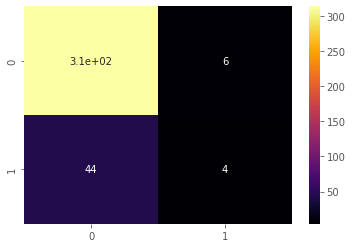

In [47]:
sns.heatmap(confmtx,cmap='inferno',annot=True)

In [48]:
#Print the classification report for predictions
print(classification_report(y_test,modely_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       320
           1       0.40      0.08      0.14        48

    accuracy                           0.86       368
   macro avg       0.64      0.53      0.53       368
weighted avg       0.81      0.86      0.82       368

